## Introduction : Exploratory data anlysis of substance abuse data



This note book is going to explore the drug data set behind the story How Baby Boomers Get High by FiveThirtyEight (https://fivethirtyeight.com/features/how-baby-boomers-get-high/). It covers 13 drugs across 17 age groups  from the Source :(http://www.icpsr.umich.edu/icpsrweb/content/SAMHDA/index.html). The description is in the Readme file with this repository .

## Data wrangling 

In [ ]:
#python dependencies

In [6]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

In [15]:
# Let's have a look at the data set

drug = pd.read_csv('./drug-use-by-age.csv')

drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [16]:
drug.shape

(17, 28)

We see that we have :
17 rows(observations)
and 28 columns(features) 

In [ ]:
# Let's look at all the features(columns) in the data set.

In [18]:
drug.columns

Index([u'age', u'n', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
       u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
       u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
       u'inhalant-frequency', u'pain-releiver-use', u'pain-releiver-frequency',
       u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
       u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
       u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
      dtype='object')

This data consists of age groups ( starting from 12 to 65 ) of  people , 
various drug abuse and thier respective frequency.

Having a look at the data we can say there are 3 type of information . 
 1. Age : This gives us various individual age from 12 to 21 and then after the age of  21 ,each age observation has a range rather than just an individual age .
 2. Various drug and their usage for the age observation 
 3. various drug and their frequency of usage for the respective age observation  

In [ ]:
# Let's check if the data requires cleaning 

In [17]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

The data does require cleaning with certain columns and these columns are :
coulmns which require cleaning (cocaine-frequency ,age ,crack-frequency,heroin-frequency,inhalant-frequency ,oxycontin-frequency,meth-frequency)


In [21]:
# Converting missing values to null:

d1=drug.replace('-', np.nan)



In [22]:
# Taking a look at data
d1.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [23]:
#Checking for null after fixing missing values:

d1.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          1
crack-use                  0
crack-frequency            3
heroin-use                 0
heroin-frequency           1
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         1
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        1
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             2
sedative-use               0
sedative-frequency         0
dtype: int64

The analysis on certain columns with missing value will result in incomplete findings and these columbs are :
crack-frequency , cocaine-frequency ,heroin-frequency,inhalant-frequency ,oxycontin-frequency ,meth-frequency.So we will drop in later .



In [26]:
# Statistical description of the dataset

d1.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [27]:
# This gives an understanding of normal distribution of the data

## EDA - exploratary data analysis.

GOALS (Some things to consider doing):

-Look for relationships between variables and subsets of those variables' values

-Derive new features from the ones available to help your analysis

-Visualize everything!


In [ ]:
# Saving column names in a variable

In [29]:
drug_use_c= d1.columns

drug_use_c

Index([u'age', u'n', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
       u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
       u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
       u'inhalant-frequency', u'pain-releiver-use', u'pain-releiver-frequency',
       u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
       u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
       u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
      dtype='object')

In [30]:
# Creating seperate data frame for use and frequency withier repective age group

use1=[]
frequency1=[]

use1.append('age')
frequency1.append('age')

for i in range(2,28):
    if i%2==0:
        use1.append(drug_use_c[i])
    else:
        frequency1.append(drug_use_c[i])
    
    
print frequency1  

print use1


['age', 'alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'hallucinogen-frequency', 'inhalant-frequency', 'pain-releiver-frequency', 'oxycontin-frequency', 'tranquilizer-frequency', 'stimulant-frequency', 'meth-frequency', 'sedative-frequency']
['age', 'alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use', 'heroin-use', 'hallucinogen-use', 'inhalant-use', 'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']


In [31]:
use11=d1[use1]

# Taking out the data that have null value to have a complete analysis of complete data only 
frequency =d1[frequency1].dropna()


In [32]:
use22=use11


In [34]:
# having a look at the use data set.

use22.head()

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


In [35]:
# Creating use data frame with the indexes coresponding to age

use=use22.set_index('age')


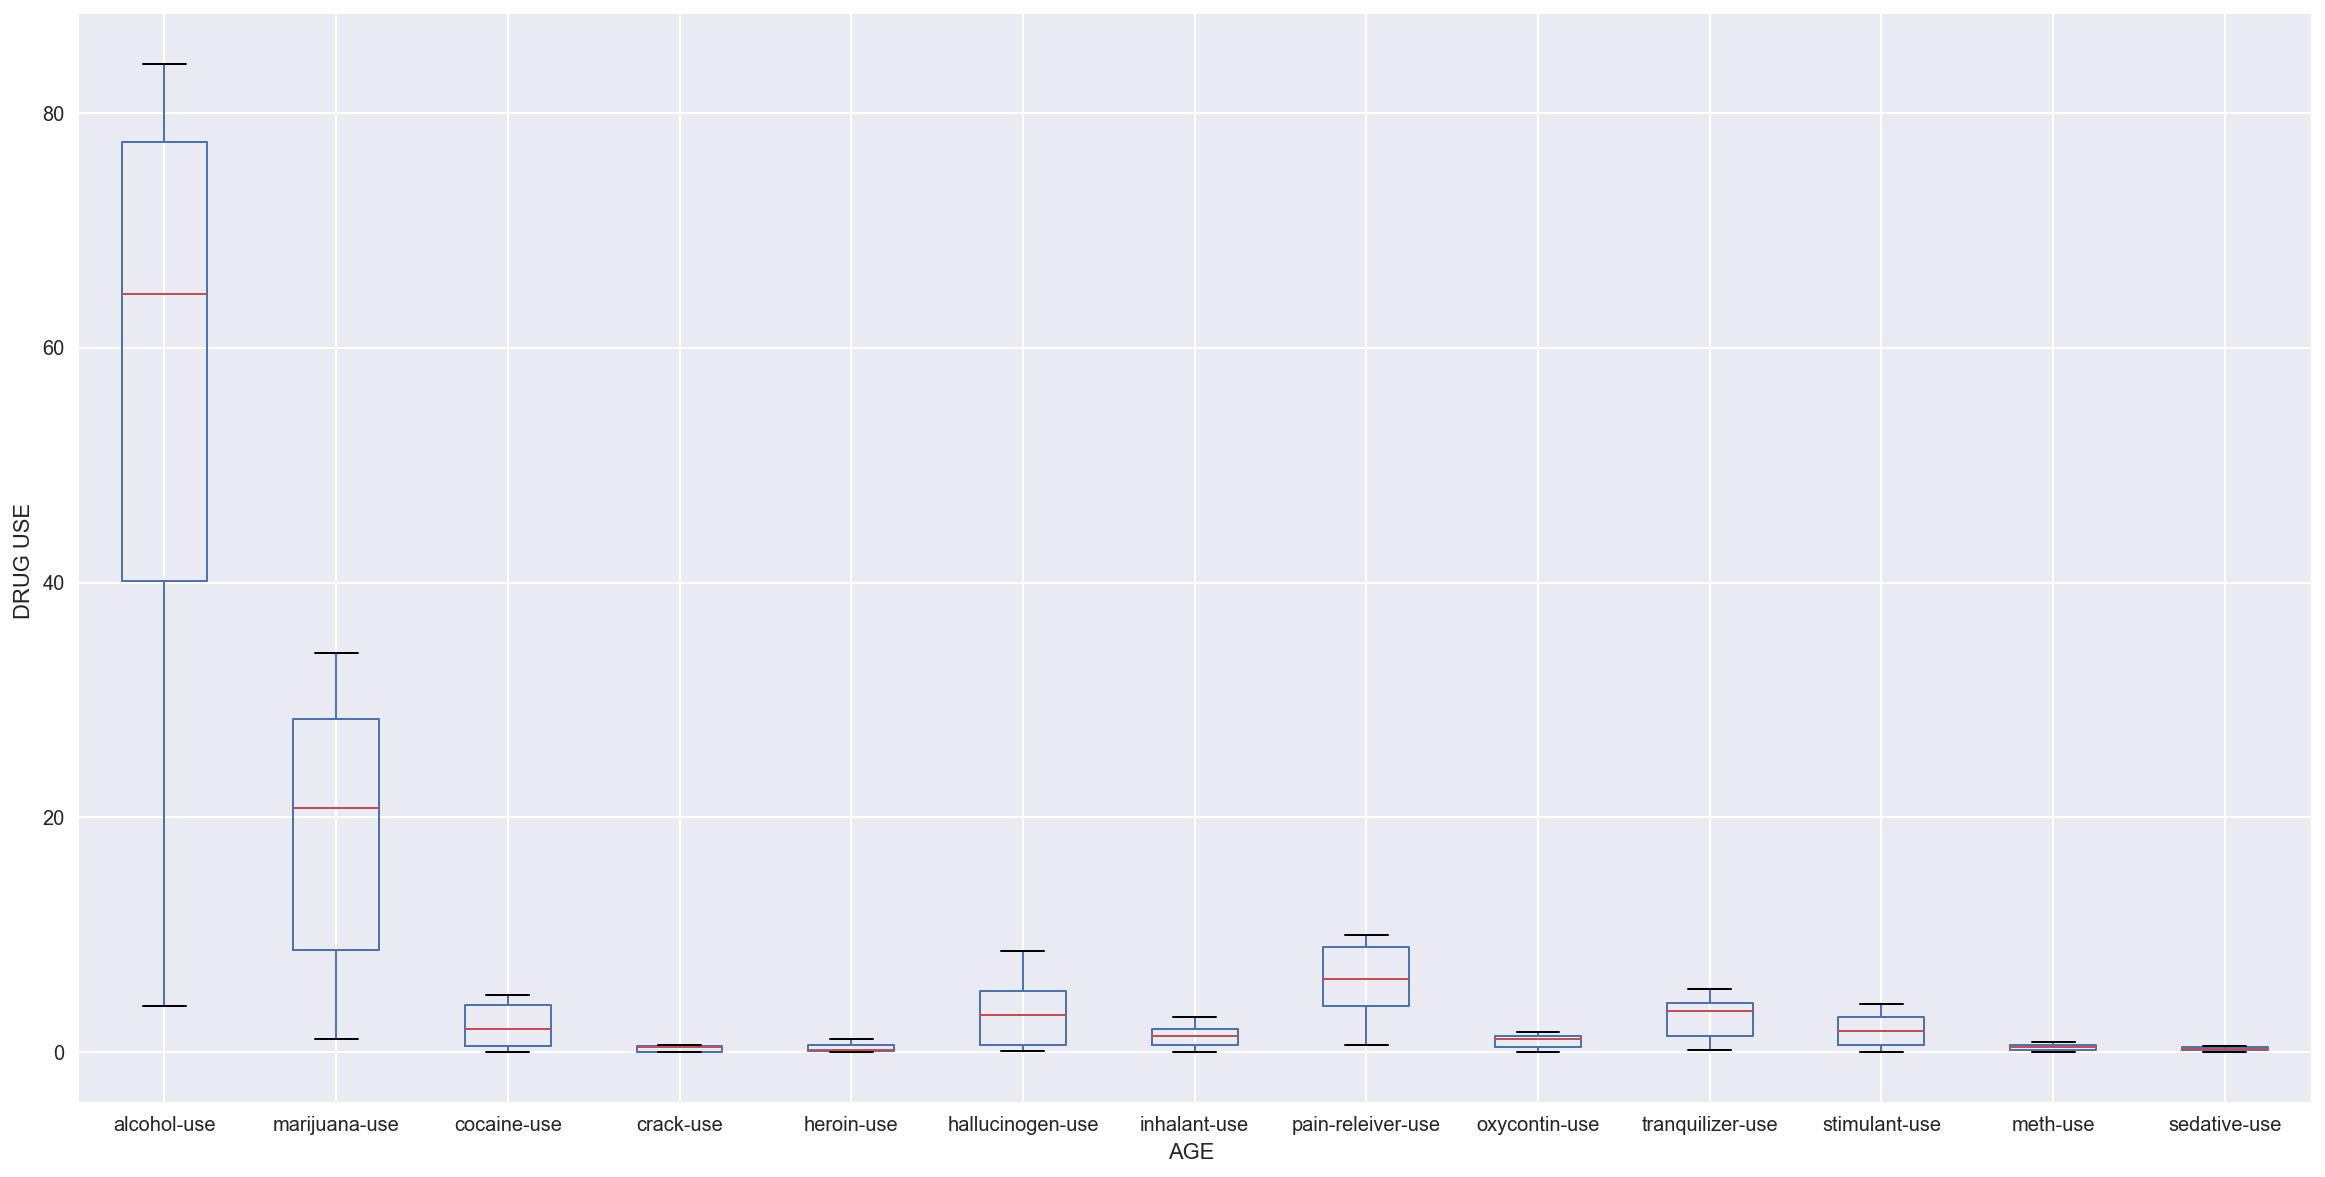

In [36]:
# Using box plot to take a look at the distribution in each column of the various drugs

use.boxplot(figsize=(20, 10))
plt.xlabel('AGE ')
plt.ylabel('DRUG USE ')

We notice the spread is high with alchol-use and marijuana and very low for sedative/crack/meth.

In [38]:
# Now we use like plot to check relation between age and the various drug abuse

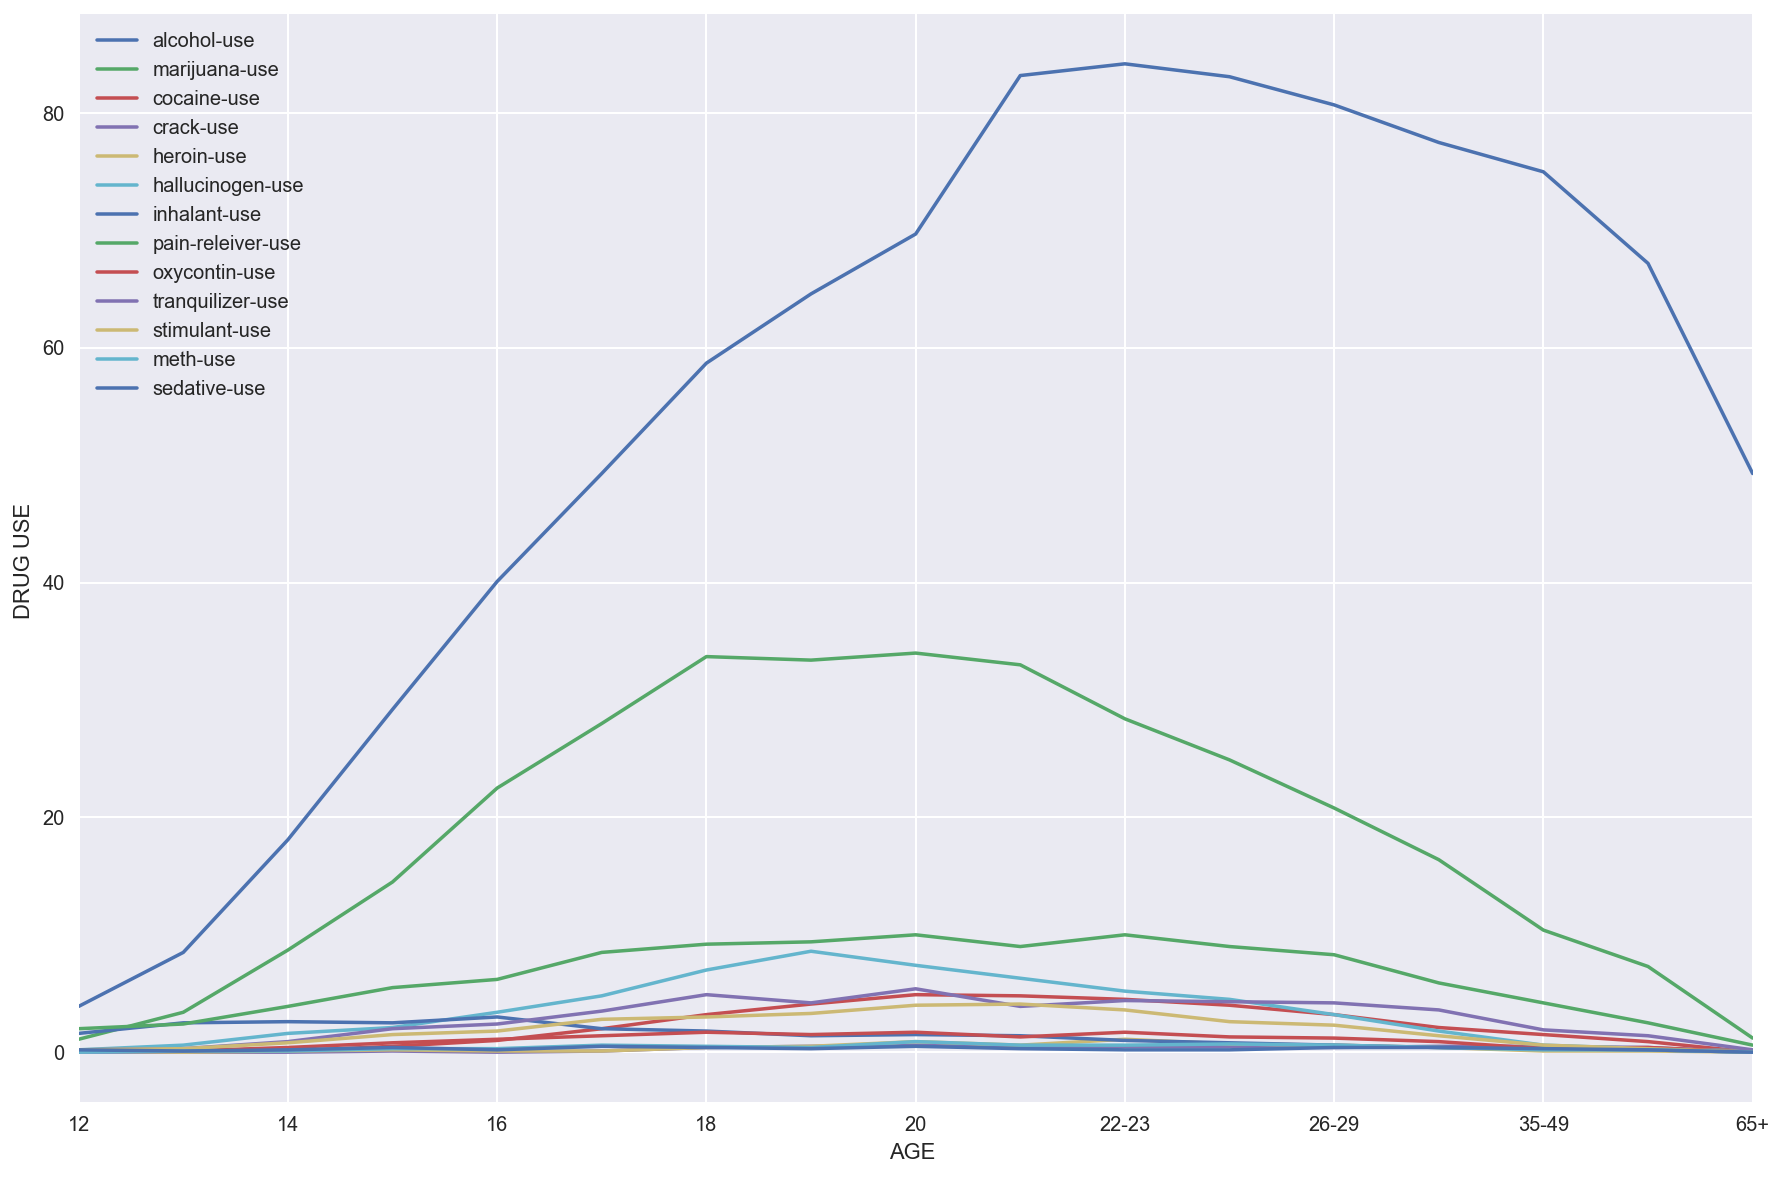

In [39]:
use.plot(figsize=(15,10))


plt.xlabel('AGE ')
plt.ylabel('DRUG USE ')

Its clear that there is very high usage of alcohol and marijuana which increases.
Its noticed that there is an increase of drug usage overall from age 16 on-wards and starts to reduce at the group age 35-49.

In [41]:
#Now lets analyse the frequency data frame

In [42]:
# set age as the index
frequency2=frequency.set_index('age')

In [44]:
# Taking a look at the data frame
frequency.head()

,age,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
3,15,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,16,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0
5,17,13.0,36.0,5.0,21.0,64.0,3.0,4.0,9.0,6.0,7.0,9.0,48.0,6.5
6,18,24.0,52.0,5.0,10.0,46.0,4.0,4.0,12.0,7.0,12.0,8.0,12.0,10.0
7,19,36.0,60.0,5.5,2.0,180.0,3.0,3.0,12.0,7.5,4.5,6.0,105.0,6.0


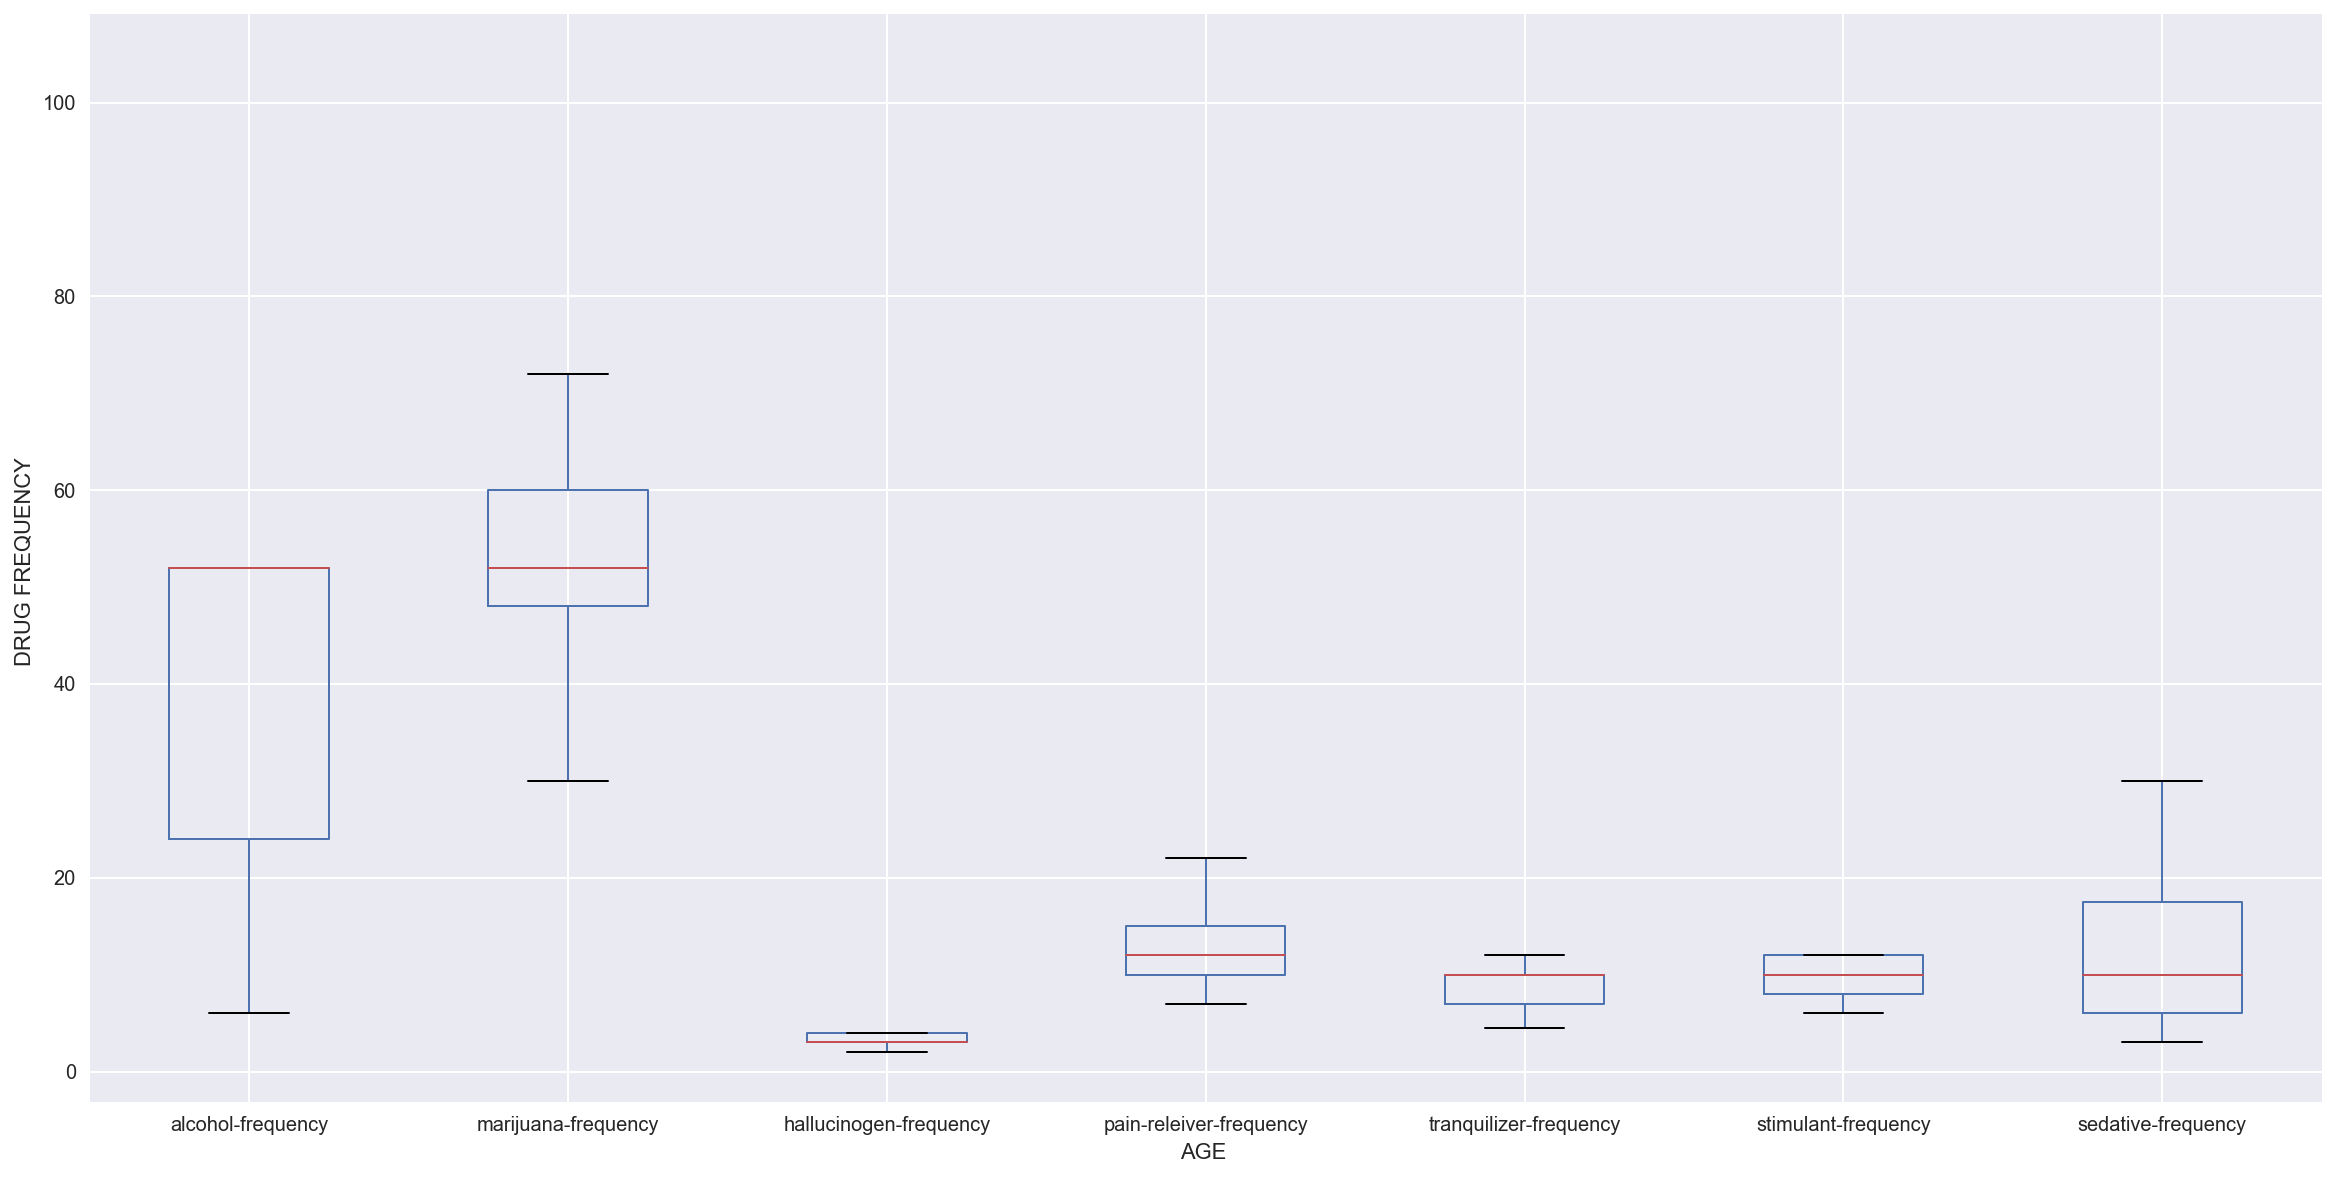

In [45]:
## Using box plot to take a look at the distribution in each column of the various drugs
frequency2.boxplot(figsize=(20, 10))
plt.xlabel('AGE ')
plt.ylabel('DRUG FREQUENCY ')


In [46]:
# alcohol-frequency 

In [47]:
# Now we use like plot to check relation between age and the various drug abuse

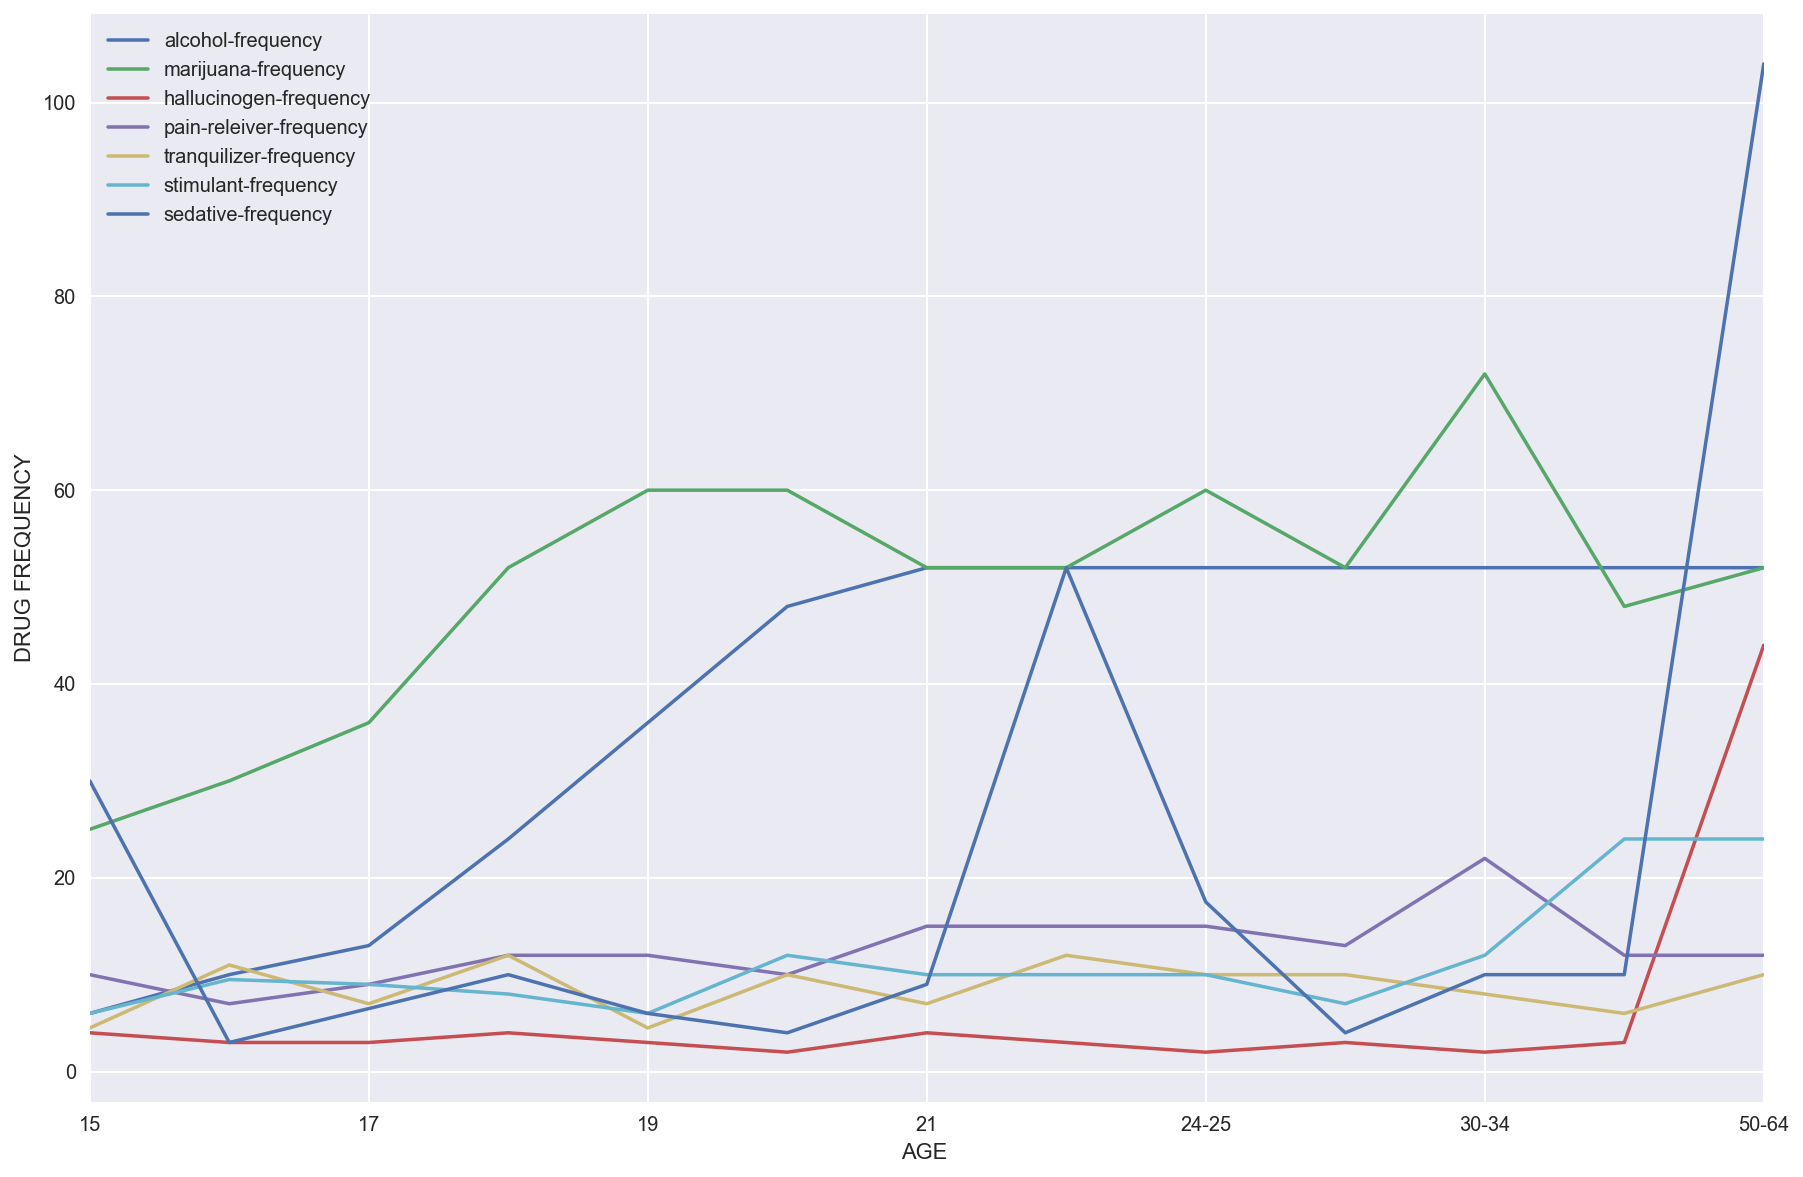

In [48]:
frequency2.plot(figsize=(15,10))

plt.xlabel('AGE ')
plt.ylabel('DRUG FREQUENCY')

There is a drastic  increase in sedative-frequency and hallucinogen-frequency between the age 34 and 50.

Steady increase of frequency in drug use from age 17.

There is a drastic increase in the use of sedative-frequency from the age of 21.

## Hypothesis 

Hypothesis :
    
The increase in the average use of a certain drug category can decrease the average use of another drug category.

If there is a  negative correlation between two drug category (use/frequency).


In [50]:

# THE CORRELATION MATRIX OF THE DATASET

In [51]:
d1.corr()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
n,1.000000,0.310512,0.313431,-0.169007,0.135597,-0.021565,0.281797,0.007798,-0.295302,0.008743,...,-0.083587,-0.112076,-0.166039,-0.071086,-0.102301,-0.201621,-0.114792,-0.063571,-0.119997,0.256701
alcohol-use,0.310512,1.000000,0.897889,0.594165,0.920425,0.773458,0.877378,0.677614,0.463702,-0.346643,...,0.617523,-0.263721,0.589219,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.318268,0.091251
alcohol-frequency,0.313431,0.897889,1.000000,0.260219,0.818769,0.577601,0.785050,0.546194,0.182184,-0.174622,...,0.280704,0.007087,0.251554,0.448543,-0.415026,0.291766,0.260304,0.425153,0.029867,0.201423
marijuana-use,-0.169007,0.594165,0.260219,1.000000,0.615610,0.883789,0.620670,0.711613,0.959353,-0.478286,...,0.966226,-0.506892,0.971733,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.616766,-0.277144
marijuana-frequency,0.135597,0.920425,0.818769,0.615610,1.000000,0.742598,0.892077,0.631789,0.528733,-0.380430,...,0.612254,-0.285292,0.609618,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.399124,0.048777
cocaine-use,-0.021565,0.773458,0.577601,0.883789,0.742598,1.000000,0.835727,0.899944,0.855668,-0.368402,...,0.906638,-0.273908,0.865626,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.461914,-0.159997
crack-use,0.281797,0.877378,0.785050,0.620670,0.892077,0.835727,1.000000,0.750790,0.556222,-0.198968,...,0.652764,-0.203711,0.603003,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.438421,0.091676
heroin-use,0.007798,0.677614,0.546194,0.711613,0.631789,0.899944,0.750790,1.000000,0.683674,-0.302988,...,0.805868,-0.135961,0.775321,0.818583,-0.175464,0.808024,-0.277996,0.816620,0.333649,-0.023708
hallucinogen-use,-0.295302,0.463702,0.182184,0.959353,0.528733,0.855668,0.556222,0.683674,1.000000,-0.427863,...,0.909333,-0.419961,0.916777,0.862900,-0.314281,0.940008,-0.319860,0.780071,0.518700,-0.312746
hallucinogen-frequency,0.008743,-0.346643,-0.174622,-0.478286,-0.380430,-0.368402,-0.198968,-0.302988,-0.427863,1.000000,...,-0.488187,0.547363,-0.442181,-0.458016,0.705734,-0.452345,-0.103980,-0.432520,-0.231773,0.533095


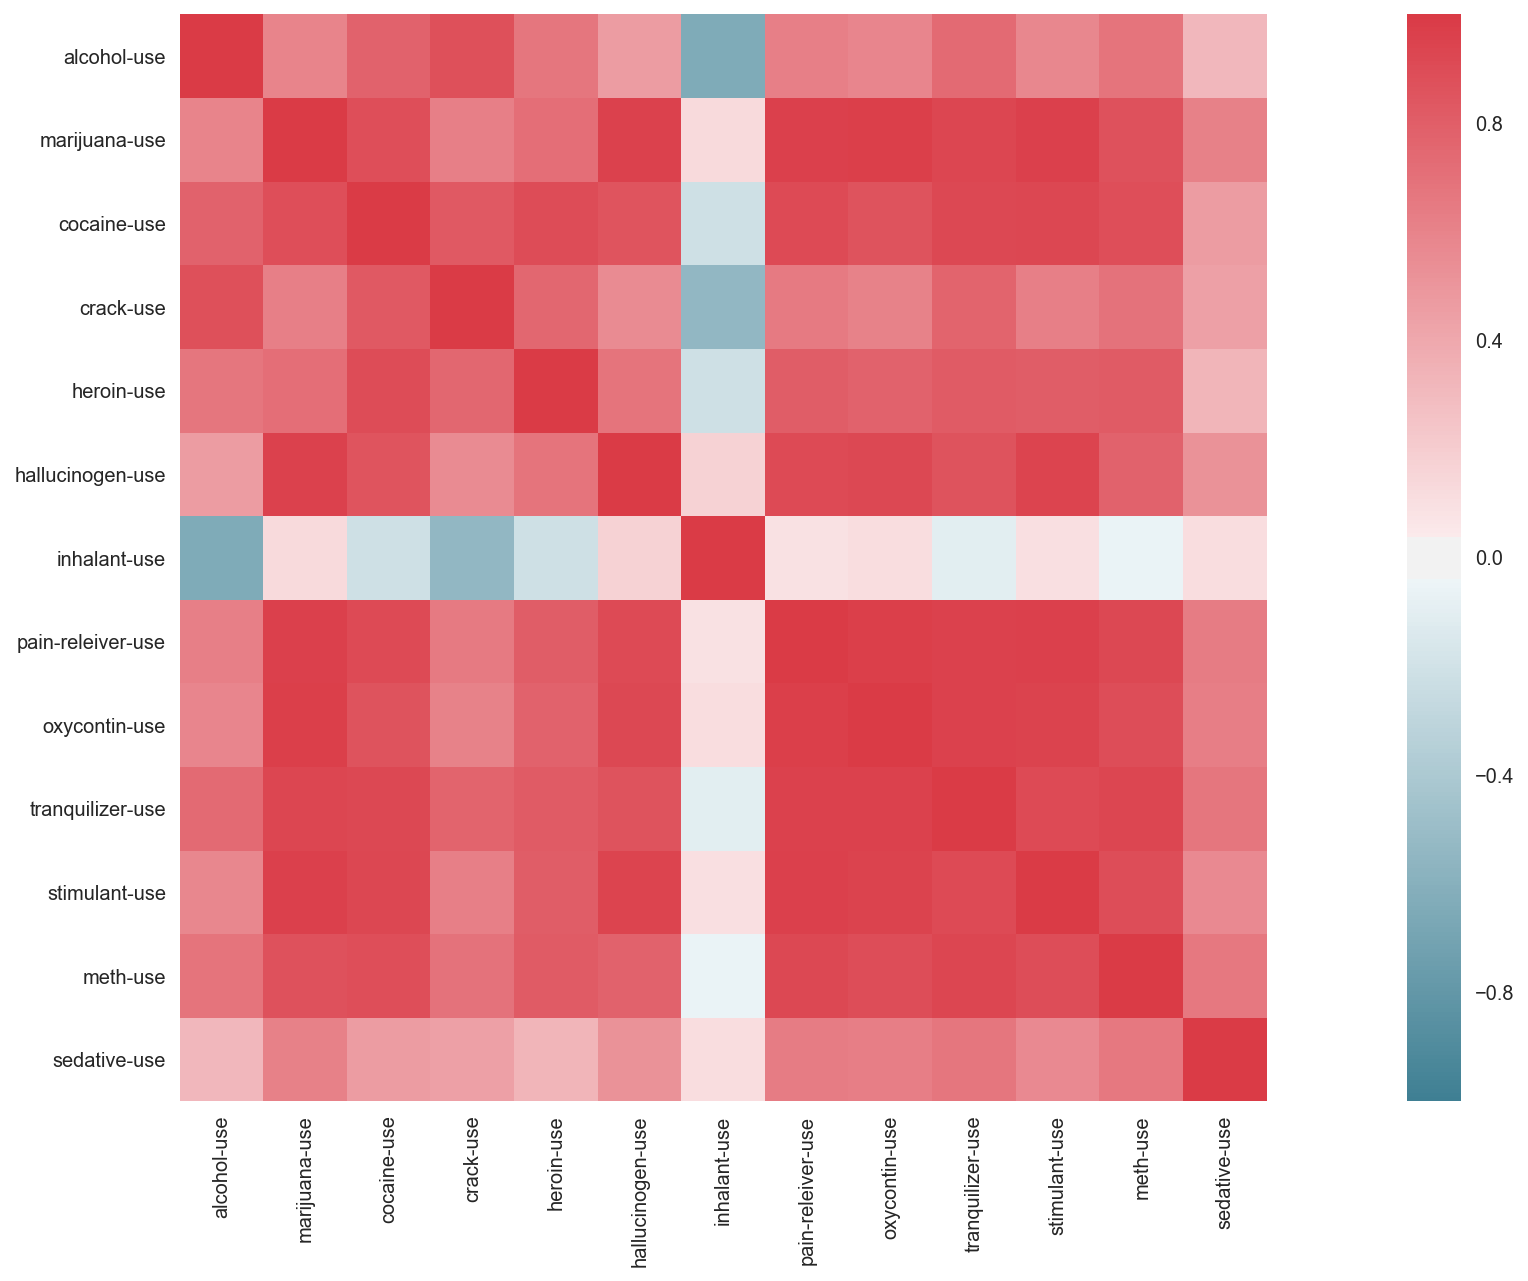

In [52]:
# CORRELATION IN DRUG-USE IN HEATMAP

import seaborn as sns

f,ax = plt.subplots(figsize=(25, 10))
corr = use.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=False)

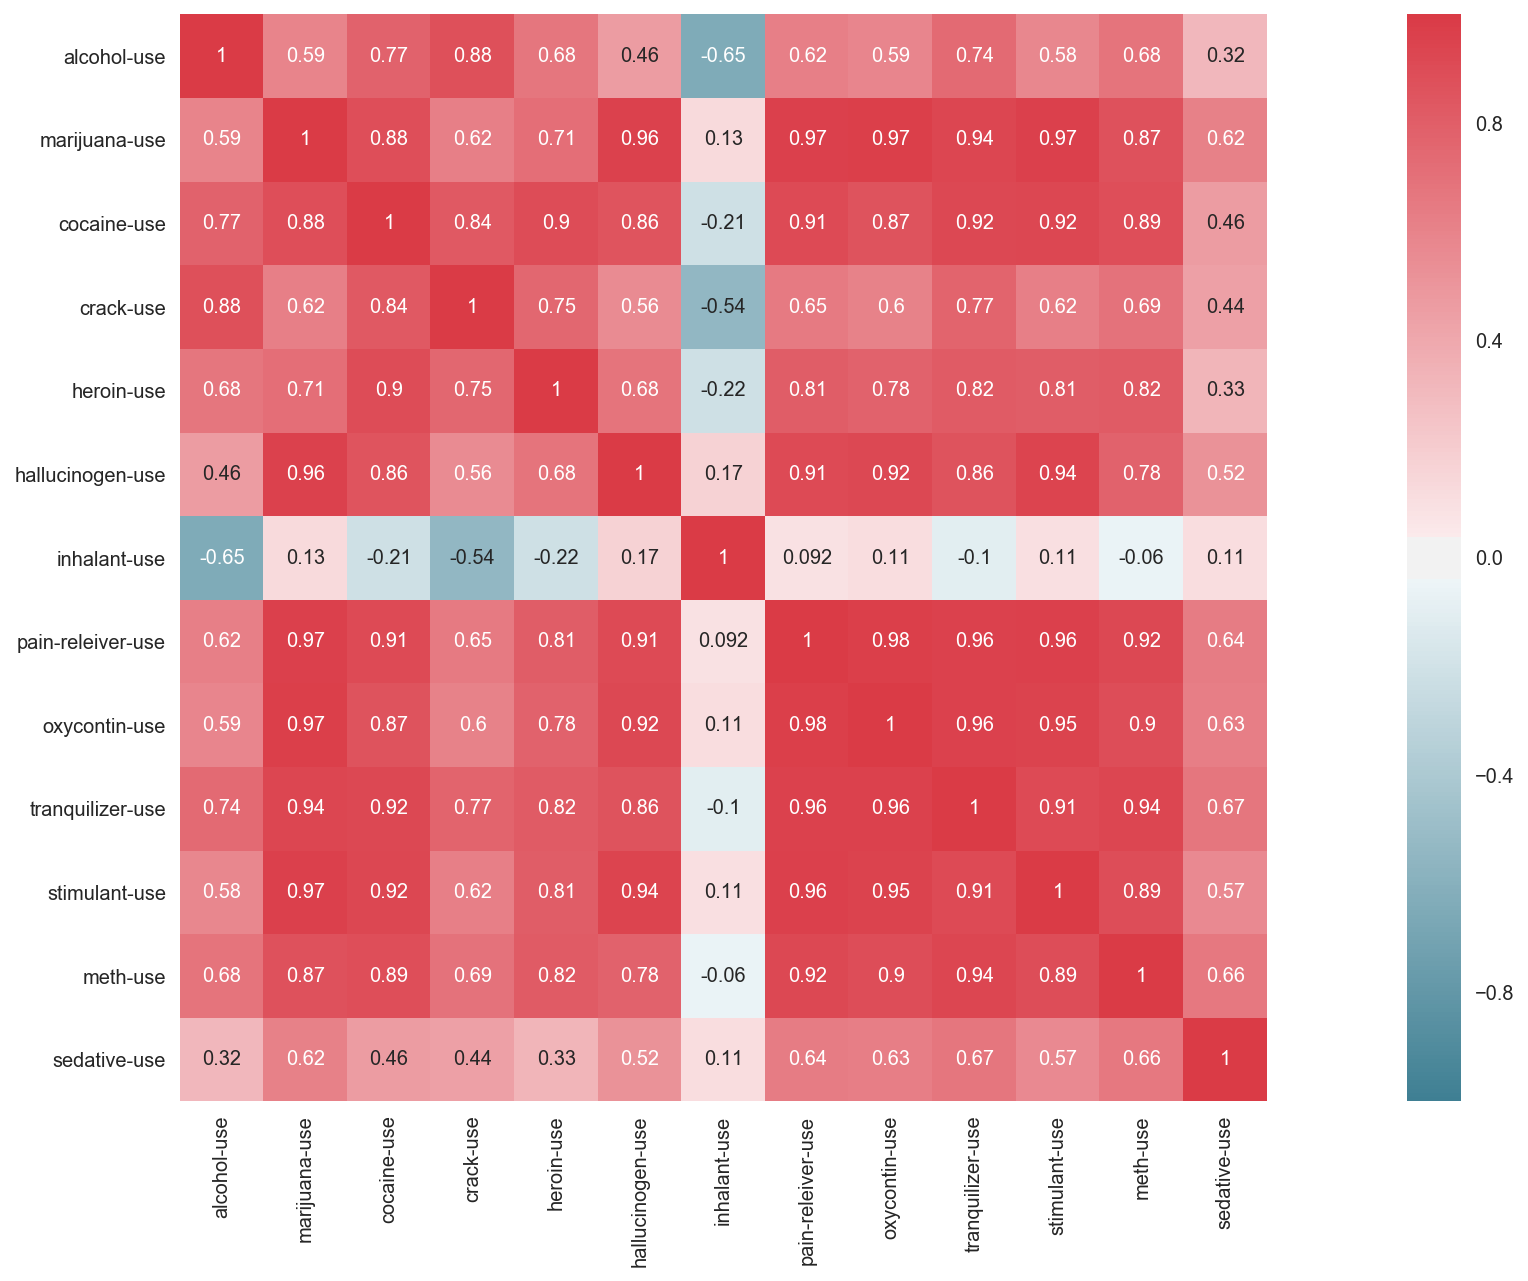

In [53]:
#CORRELATION IN DRUG-USE IN HEATMAP


import seaborn as sns

f,ax = plt.subplots(figsize=(25, 10))
corr = use.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

There is a negative correlation between alcohol-use and  inhalant-use

So there could be a possibility that use of alcohol might reduce the possibility of inhalant use


In [56]:
#CORRELATION IN DRUG-FREQUENCY IN HEATMAP

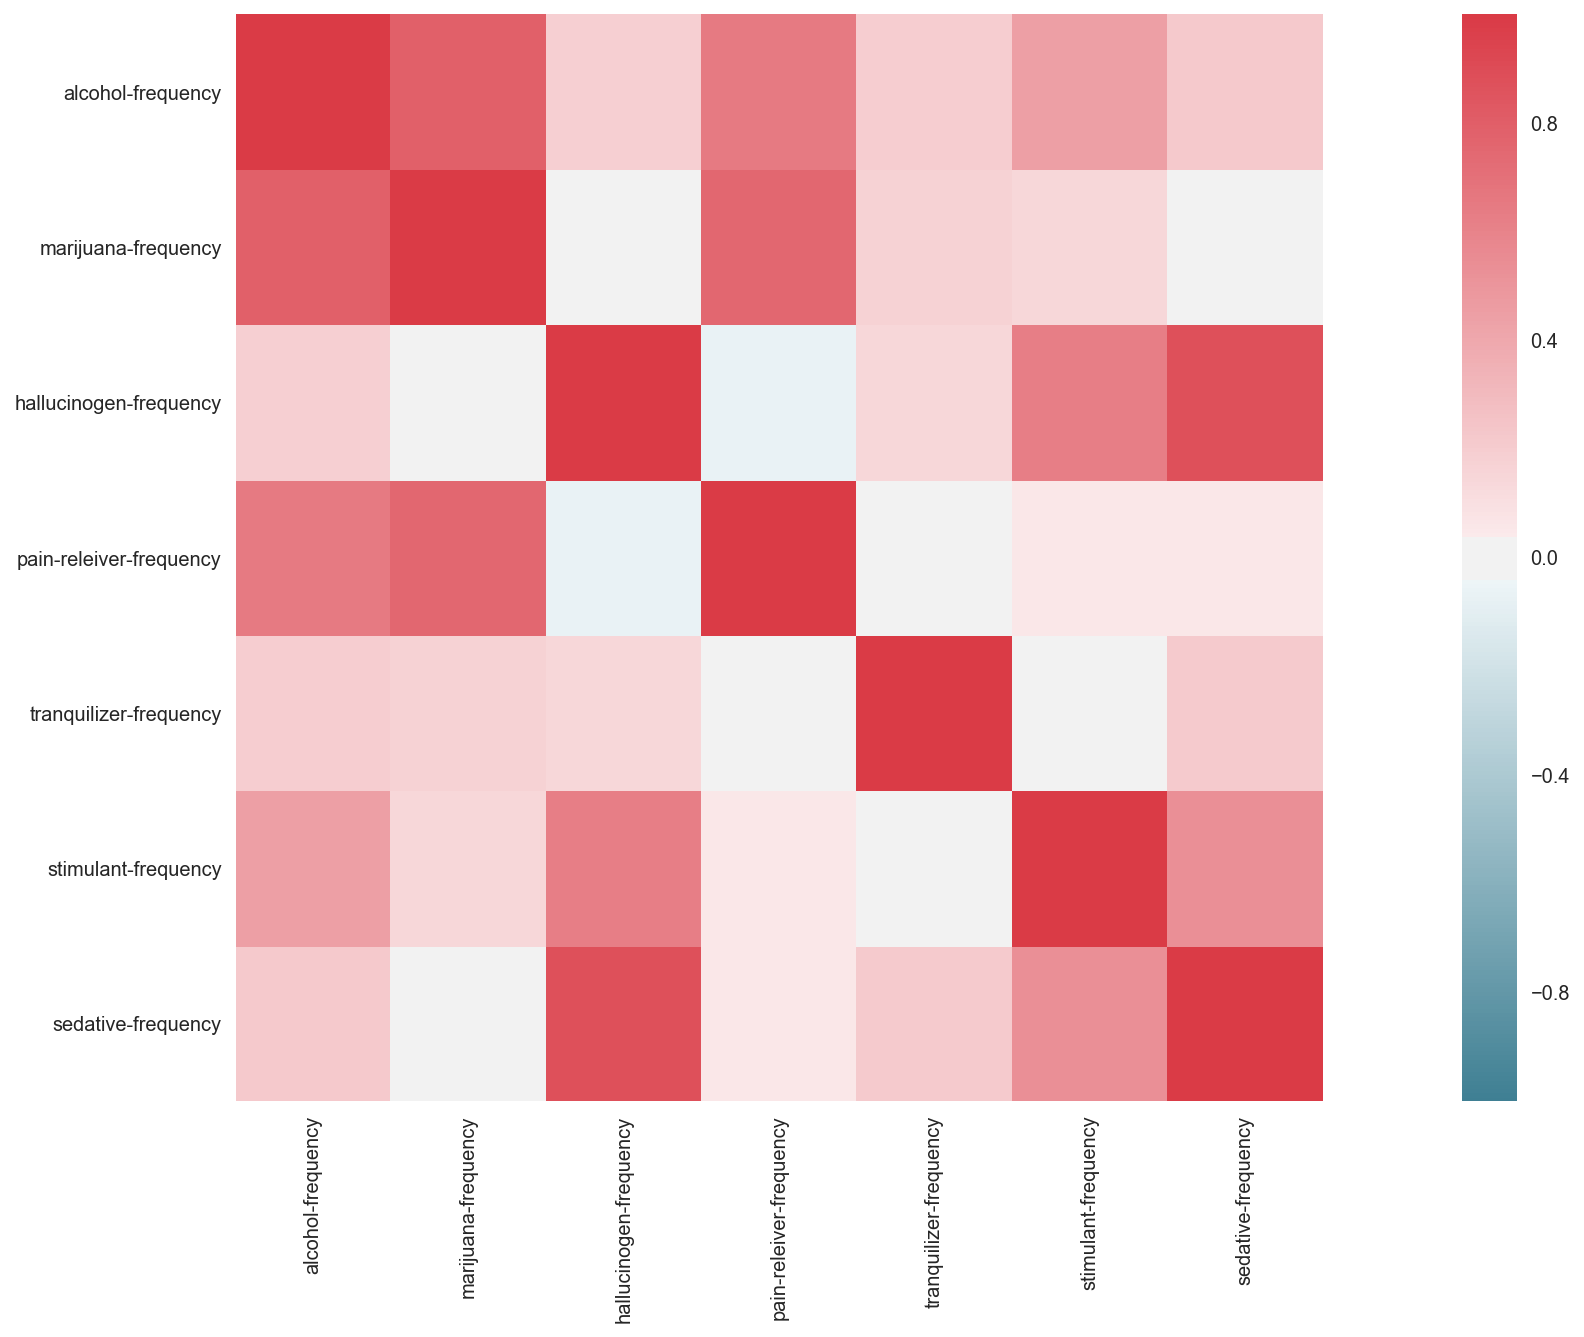

In [57]:
import seaborn as sns

f,ax = plt.subplots(figsize=(25, 10))
corr = frequency2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=False)

In [58]:
#CORRELATION IN DRUG-FREQUENCY IN HEATMAP

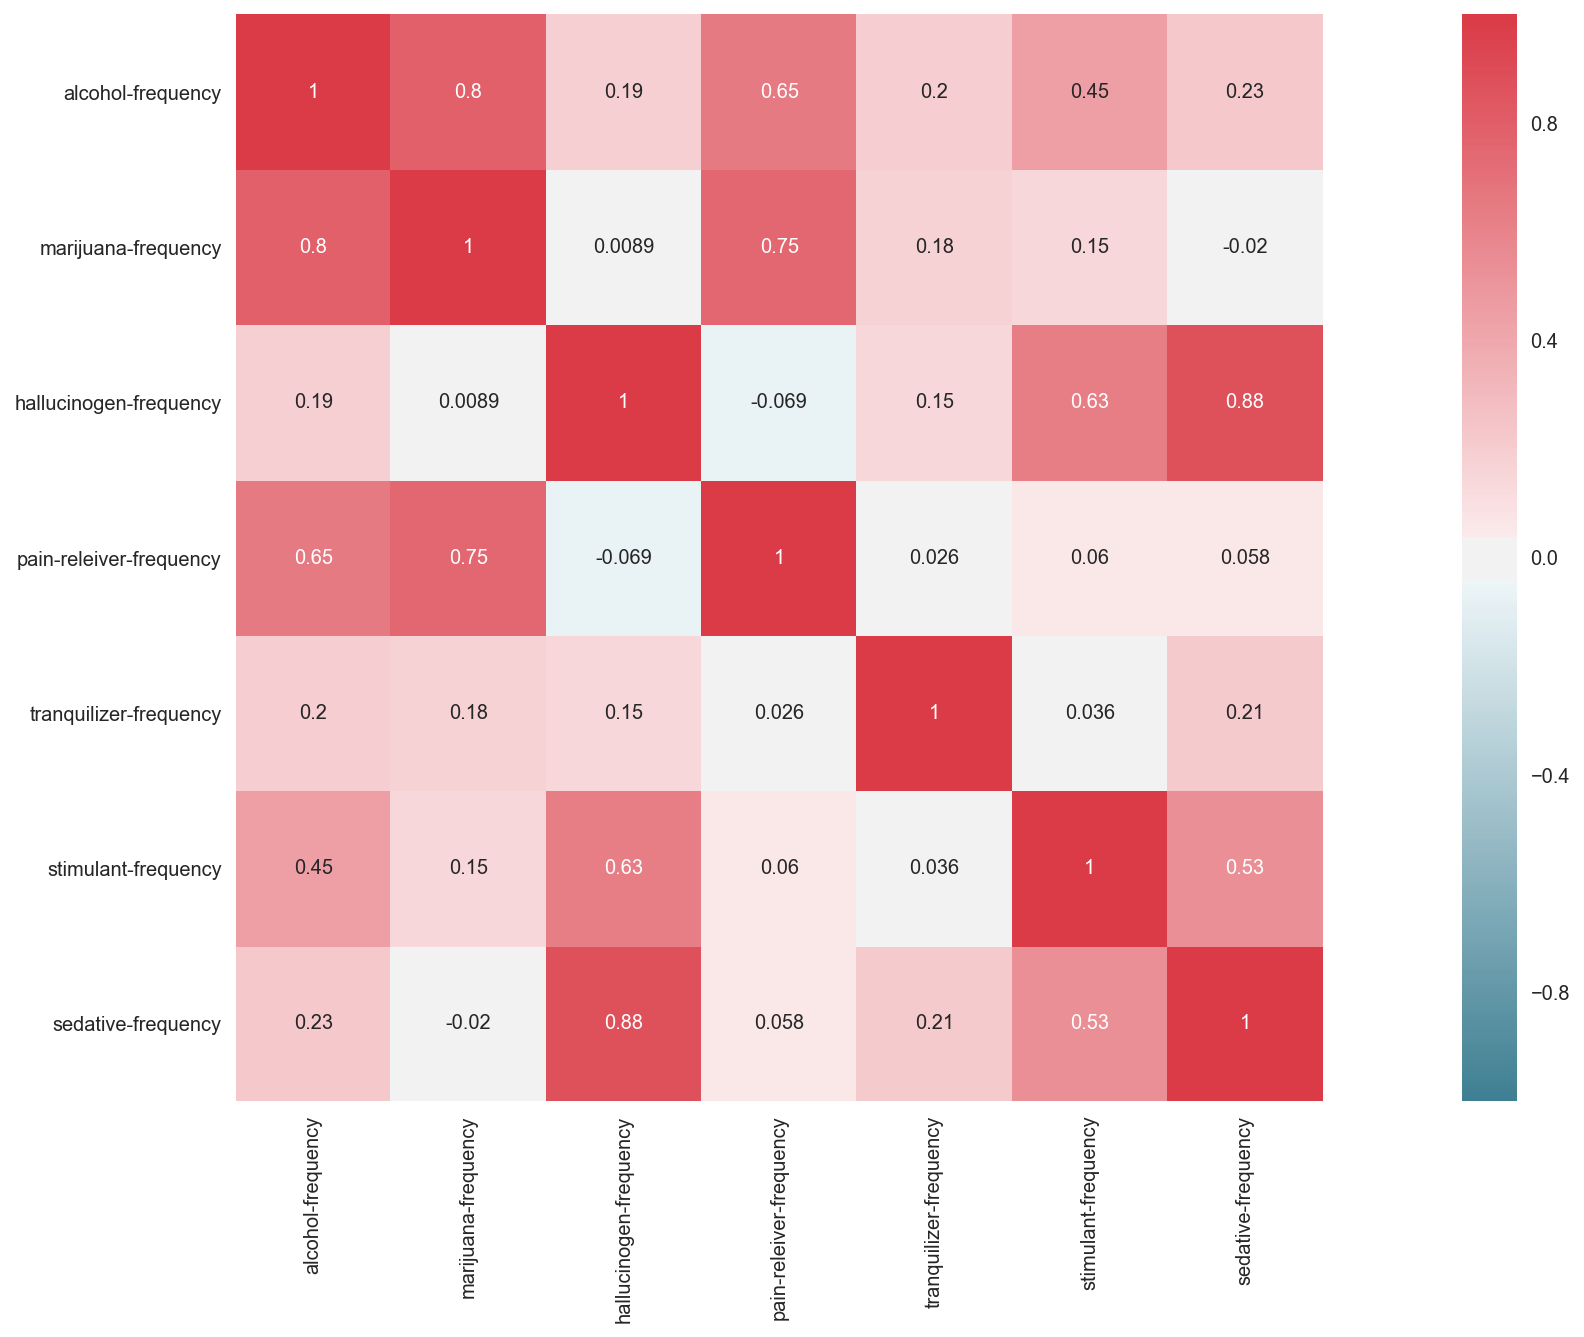

In [59]:
import seaborn as sns

f,ax = plt.subplots(figsize=(25, 10))
corr = frequency2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

There is  strong negative correlation between inhalant drug-use and alcohol-frequency.

There is also a negative correlation between inhalant drug-use and alcohol-use.

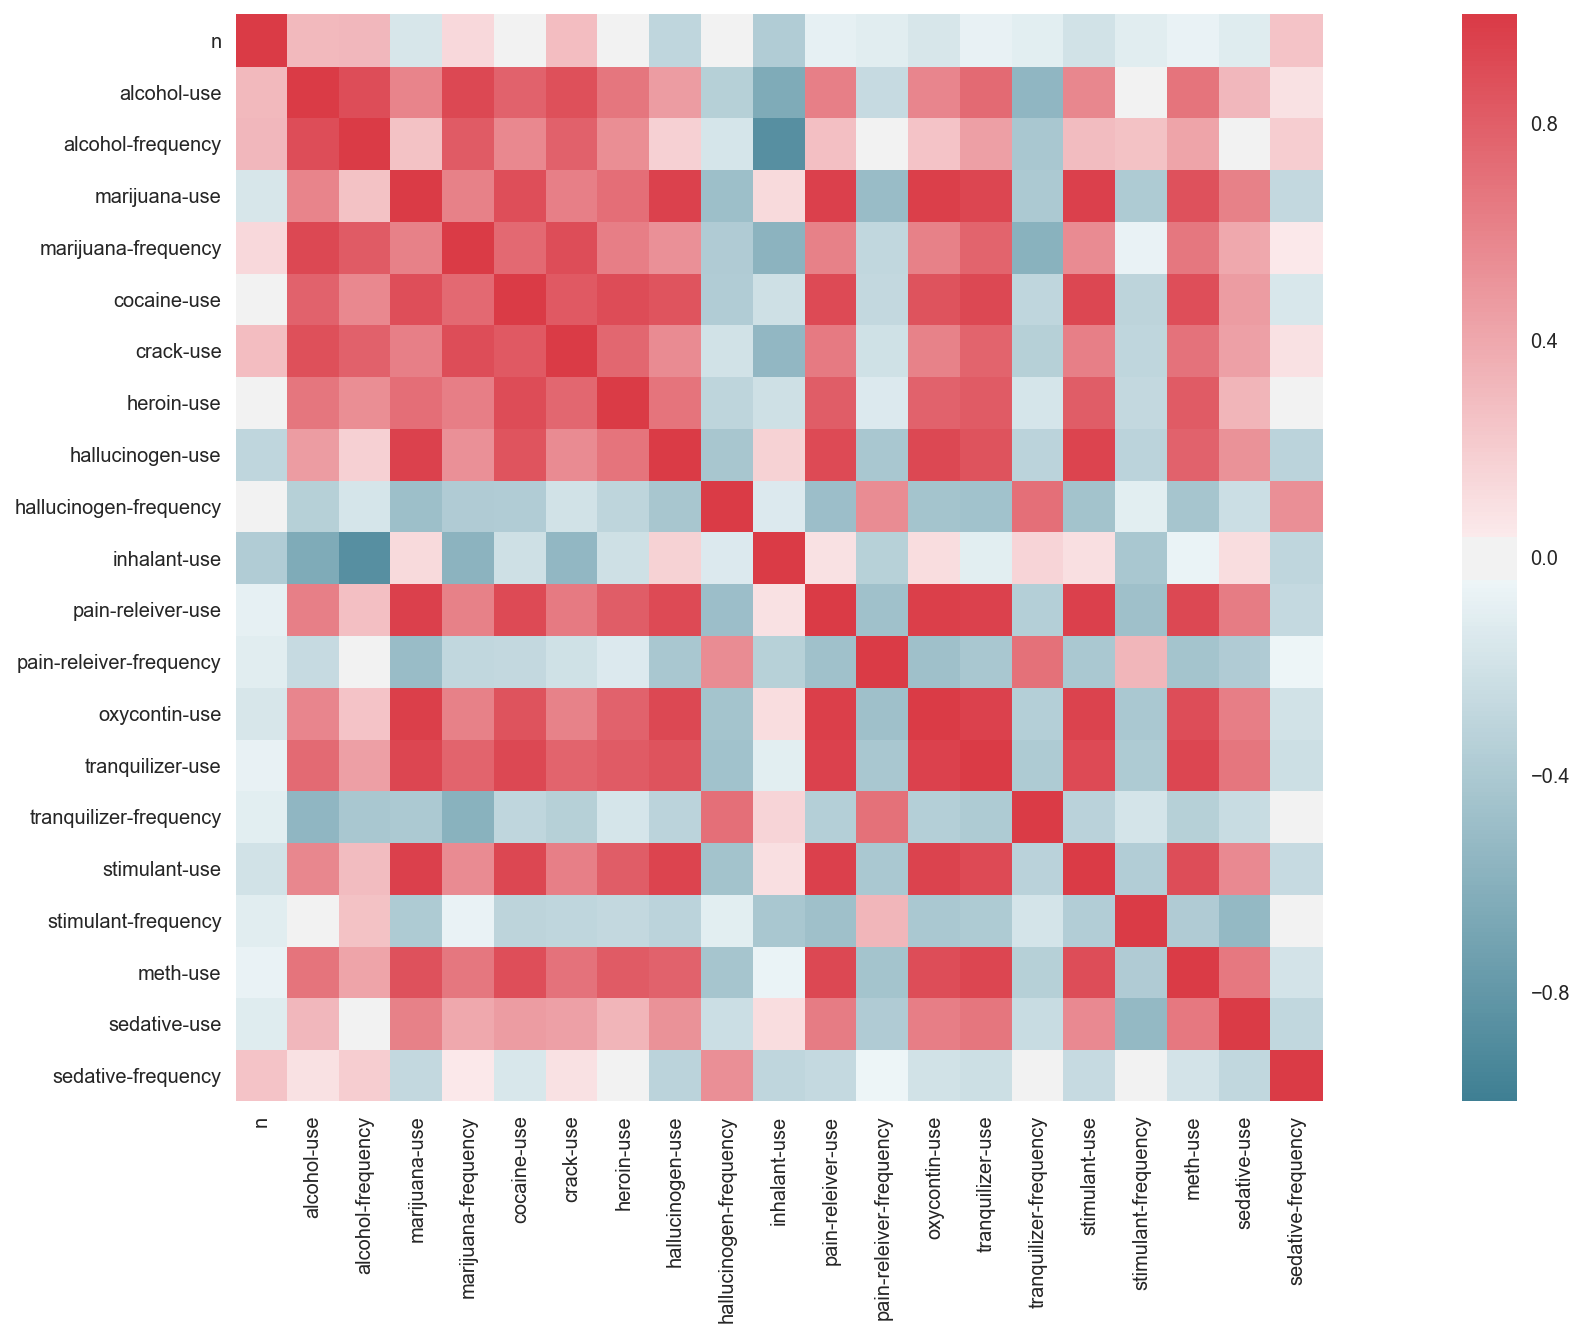

In [62]:
# CORRELATION OF DRUG USE/FREQUENCY IN HEATMAP

import seaborn as sns

f,ax = plt.subplots(figsize=(25, 10))
corr = d1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=False)


There is  strong negative correlation between inhalant drug-use and alcholo-frequency.

There is also a negative correlation between inhalant drug-use and alcholo-use.

In [63]:
# CORRELATION OF DRUG USE/FREQUENCY IN HEATMAP WITH VALUES

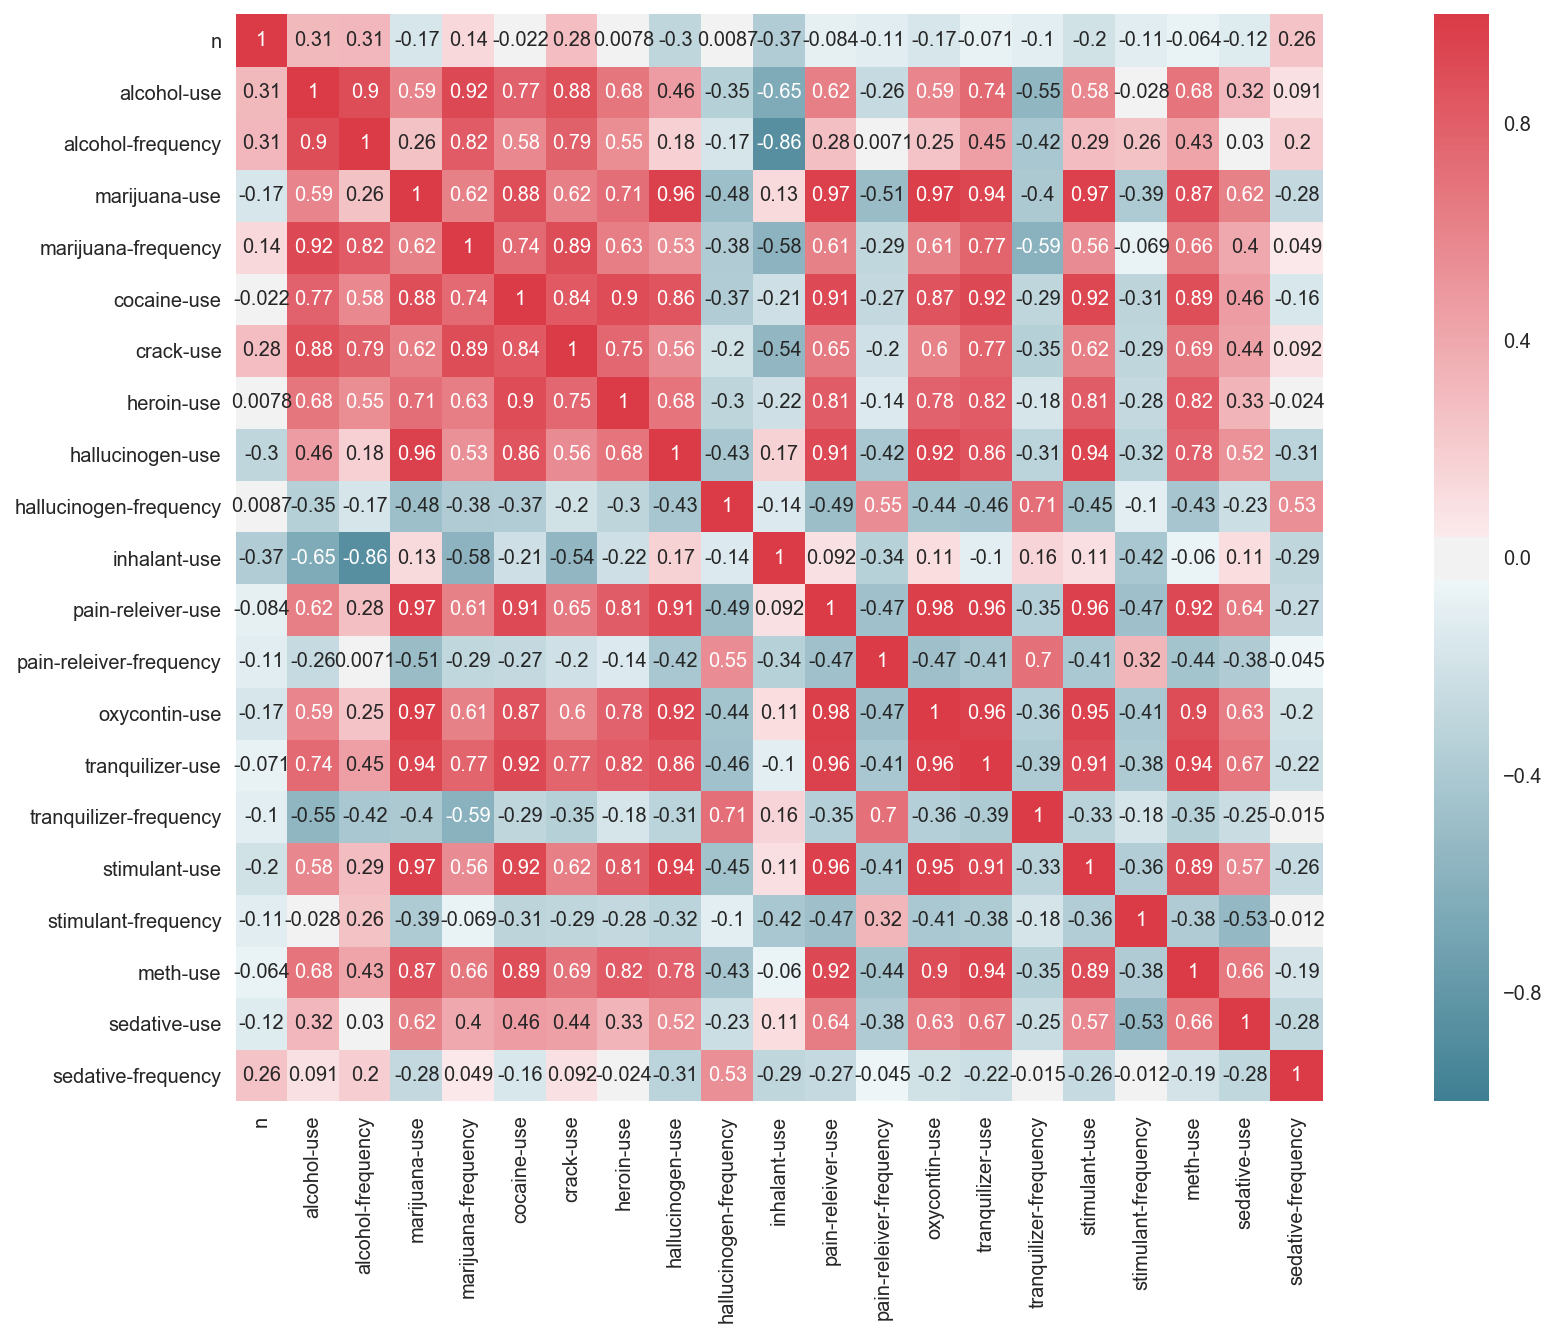

In [64]:

import seaborn as sns

f,ax = plt.subplots(figsize=(20, 10))
corr = d1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

There is  strong negative correlation between inhalant drug-use and alcohol-frequency  of  -0.86.

There is also a negative correlation between inhalant drug-use and alcohol-use of -0.65.

## Inference

From exploring the correlation of the data set we can make some inference with respect to the hypothesis they are :
    
There is strong negative correlation between inhalant-use and alcohol-frequency  of -0.86.

There is also a negative correlation between inhalant-use and alcohol-use  of -0.65.

The increase in the average use of a alcohol can reduce the average use of inhalant.

The increase in the average use of a inhalant can reduce the average use of alcohol.

The hypothesis is not rejected :The increase in the average use of a certain drug category can reduce the average use of another drug category. 
